In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [3]:
df = pd.read_csv("titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
class Analyzer(object):
    def __init__(self, data, input: float):
        self.data: pd.DataFrame = data
        self.scalar = None
        self.srs = None
        self.df = None
        self.input = input

    def __repr__(self):
        items = []
        for k, v in self.__dict__.items():
            try:
                item = f"{k}={repr(v)}"
                assert len(item) < 100
            except Exception:
                item = f"{k}=<{type(v).__name__}>"
            items.append(item)
        return f"{self.__class__.__name__}({', '.join(items)})"

    def analyze(self, column):
        # Perform some analysis on self.data
        self.scalar = self.input + 2
        self.srs = self.data[column].describe(include="all")
        assert isinstance(self.srs, pd.Series), "Expected a Series for srs"
        self.df = pd.concat([self.data[column], self.data[column]], axis=1)
        return self

    def plot(self, column):
        print(column)
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))
        if self.data[column].dtype == "object":
            ax.bar(
                self.data[column].value_counts().index,
                self.data[column].value_counts().values,
            )
        else:
            ax.hist(self.data[column].astype(float), bins=30, alpha=0.7, color="blue")
        ax.set_title(f"Distribution of {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("Frequency")
        return fig, ax

In [5]:
ana = Analyzer(df, 3)
print(ana.analyze("age").scalar)
print(ana.analyze("age").srs.head())
print(ana.analyze("age").df.head())
ana

5
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
Name: age, dtype: float64
    age   age
0  22.0  22.0
1  38.0  38.0
2  26.0  26.0
3  35.0  35.0
4  35.0  35.0


Analyzer(data=<DataFrame>, scalar=5, srs=<Series>, df=<DataFrame>, input=3)

In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
ops_df = pd.DataFrame()
ops_df["columns"] = df.columns
ops_df["inputs"] = list(range(1, len(df.columns) + 1))
ops_df

,columns,inputs
0,survived,1
1,pclass,2
2,sex,3
3,age,4
4,sibsp,5
5,parch,6
6,fare,7
7,embarked,8
8,class,9
9,who,10


In [8]:
ops_df["analyzer"] = ops_df["inputs"].map(lambda x: Analyzer(df, x))
ops_df

,columns,inputs,analyzer
0,survived,1,"Analyzer(data=<DataFrame>, scalar=None, srs=No..."
1,pclass,2,"Analyzer(data=<DataFrame>, scalar=None, srs=No..."
2,sex,3,"Analyzer(data=<DataFrame>, scalar=None, srs=No..."
3,age,4,"Analyzer(data=<DataFrame>, scalar=None, srs=No..."
4,sibsp,5,"Analyzer(data=<DataFrame>, scalar=None, srs=No..."
5,parch,6,"Analyzer(data=<DataFrame>, scalar=None, srs=No..."
6,fare,7,"Analyzer(data=<DataFrame>, scalar=None, srs=No..."
7,embarked,8,"Analyzer(data=<DataFrame>, scalar=None, srs=No..."
8,class,9,"Analyzer(data=<DataFrame>, scalar=None, srs=No..."
9,who,10,"Analyzer(data=<DataFrame>, scalar=None, srs=No..."


In [9]:
ops_df.apply(lambda x: x["analyzer"].analyze(x["columns"]), axis=1)

0     Analyzer(data=<DataFrame>, scalar=3, srs=<Seri...
1     Analyzer(data=<DataFrame>, scalar=4, srs=<Seri...
2     Analyzer(data=<DataFrame>, scalar=5, srs=count...
3     Analyzer(data=<DataFrame>, scalar=6, srs=<Seri...
4     Analyzer(data=<DataFrame>, scalar=7, srs=<Seri...
5     Analyzer(data=<DataFrame>, scalar=8, srs=<Seri...
6     Analyzer(data=<DataFrame>, scalar=9, srs=<Seri...
7     Analyzer(data=<DataFrame>, scalar=10, srs=coun...
8     Analyzer(data=<DataFrame>, scalar=11, srs=coun...
9     Analyzer(data=<DataFrame>, scalar=12, srs=coun...
10    Analyzer(data=<DataFrame>, scalar=13, srs=coun...
11    Analyzer(data=<DataFrame>, scalar=14, srs=coun...
12    Analyzer(data=<DataFrame>, scalar=15, srs=<Ser...
13    Analyzer(data=<DataFrame>, scalar=16, srs=coun...
14    Analyzer(data=<DataFrame>, scalar=17, srs=coun...
dtype: object

In [10]:
ops_df["scalar"] = ops_df["analyzer"].apply(lambda x: x.scalar)
ops_df

,columns,inputs,analyzer,scalar
0,survived,1,"Analyzer(data=<DataFrame>, scalar=3, srs=<Seri...",3
1,pclass,2,"Analyzer(data=<DataFrame>, scalar=4, srs=<Seri...",4
2,sex,3,"Analyzer(data=<DataFrame>, scalar=5, srs=count...",5
3,age,4,"Analyzer(data=<DataFrame>, scalar=6, srs=<Seri...",6
4,sibsp,5,"Analyzer(data=<DataFrame>, scalar=7, srs=<Seri...",7
5,parch,6,"Analyzer(data=<DataFrame>, scalar=8, srs=<Seri...",8
6,fare,7,"Analyzer(data=<DataFrame>, scalar=9, srs=<Seri...",9
7,embarked,8,"Analyzer(data=<DataFrame>, scalar=10, srs=coun...",10
8,class,9,"Analyzer(data=<DataFrame>, scalar=11, srs=coun...",11
9,who,10,"Analyzer(data=<DataFrame>, scalar=12, srs=coun...",12


In [11]:
ops_df["df"] = ops_df["analyzer"].apply(lambda x: x.df)
ops_df

,columns,inputs,analyzer,scalar,df
0,survived,1,"Analyzer(data=<DataFrame>, scalar=3, srs=<Seri...",3,survived survived 0 0 ...
1,pclass,2,"Analyzer(data=<DataFrame>, scalar=4, srs=<Seri...",4,pclass pclass 0 3 3 1 ...
2,sex,3,"Analyzer(data=<DataFrame>, scalar=5, srs=count...",5,sex sex 0 male male 1 f...
3,age,4,"Analyzer(data=<DataFrame>, scalar=6, srs=<Seri...",6,age age 0 22.0 22.0 1 38.0 38....
4,sibsp,5,"Analyzer(data=<DataFrame>, scalar=7, srs=<Seri...",7,sibsp sibsp 0 1 1 1 1...
5,parch,6,"Analyzer(data=<DataFrame>, scalar=8, srs=<Seri...",8,parch parch 0 0 0 1 0...
6,fare,7,"Analyzer(data=<DataFrame>, scalar=9, srs=<Seri...",9,fare fare 0 7.2500 7.2500 1 ...
7,embarked,8,"Analyzer(data=<DataFrame>, scalar=10, srs=coun...",10,embarked embarked 0 S S 1 ...
8,class,9,"Analyzer(data=<DataFrame>, scalar=11, srs=coun...",11,class class 0 Third Third 1 ...
9,who,10,"Analyzer(data=<DataFrame>, scalar=12, srs=coun...",12,who who 0 man man 1 woman...


In [24]:
ops_df["srs"] = ops_df["analyzer"].map(lambda x: [x.srs])
ops_df

,columns,inputs,analyzer,scalar,df,srs,plots
0,survived,1,"Analyzer(data=<DataFrame>, scalar=3, srs=<Seri...",3,survived survived 0 0 ...,"[[891.0, 0.3838383838383838, 0.486592454264857...","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
1,pclass,2,"Analyzer(data=<DataFrame>, scalar=4, srs=<Seri...",4,pclass pclass 0 3 3 1 ...,"[[891.0, 2.308641975308642, 0.836071240977049,...","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
2,sex,3,"Analyzer(data=<DataFrame>, scalar=5, srs=count...",5,sex sex 0 male male 1 f...,"[[891, 2, male, 577]]","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
3,age,4,"Analyzer(data=<DataFrame>, scalar=6, srs=<Seri...",6,age age 0 22.0 22.0 1 38.0 38....,"[[714.0, 29.69911764705882, 14.526497332334042...","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
4,sibsp,5,"Analyzer(data=<DataFrame>, scalar=7, srs=<Seri...",7,sibsp sibsp 0 1 1 1 1...,"[[891.0, 0.5230078563411896, 1.102743432293431...","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
5,parch,6,"Analyzer(data=<DataFrame>, scalar=8, srs=<Seri...",8,parch parch 0 0 0 1 0...,"[[891.0, 0.38159371492704824, 0.80605722112994...","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
6,fare,7,"Analyzer(data=<DataFrame>, scalar=9, srs=<Seri...",9,fare fare 0 7.2500 7.2500 1 ...,"[[891.0, 32.204207968574636, 49.6934285971809,...","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
7,embarked,8,"Analyzer(data=<DataFrame>, scalar=10, srs=coun...",10,embarked embarked 0 S S 1 ...,"[[889, 3, S, 644]]","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
8,class,9,"Analyzer(data=<DataFrame>, scalar=11, srs=coun...",11,class class 0 Third Third 1 ...,"[[891, 3, Third, 491]]","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
9,who,10,"Analyzer(data=<DataFrame>, scalar=12, srs=coun...",12,who who 0 man man 1 woman...,"[[891, 3, man, 537]]","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"


In [22]:
ops_df["plots"] = ops_df.apply(lambda x: x["analyzer"].plot(x["columns"]), axis=1)
plt.close("all")
ops_df

survived
pclass
sex
age
sibsp
parch
fare
embarked
class
who
adult_male
deck
embark_town
alive
alone


,columns,inputs,analyzer,scalar,df,srs,plots
0,survived,1,"Analyzer(data=<DataFrame>, scalar=3, srs=<Seri...",3,survived survived 0 0 ...,"[[891.0, 0.3838383838383838, 0.486592454264857...","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
1,pclass,2,"Analyzer(data=<DataFrame>, scalar=4, srs=<Seri...",4,pclass pclass 0 3 3 1 ...,"[[891.0, 2.308641975308642, 0.836071240977049,...","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
2,sex,3,"Analyzer(data=<DataFrame>, scalar=5, srs=count...",5,sex sex 0 male male 1 f...,"[[891, 2, male, 577]]","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
3,age,4,"Analyzer(data=<DataFrame>, scalar=6, srs=<Seri...",6,age age 0 22.0 22.0 1 38.0 38....,"[[714.0, 29.69911764705882, 14.526497332334042...","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
4,sibsp,5,"Analyzer(data=<DataFrame>, scalar=7, srs=<Seri...",7,sibsp sibsp 0 1 1 1 1...,"[[891.0, 0.5230078563411896, 1.102743432293431...","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
5,parch,6,"Analyzer(data=<DataFrame>, scalar=8, srs=<Seri...",8,parch parch 0 0 0 1 0...,"[[891.0, 0.38159371492704824, 0.80605722112994...","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
6,fare,7,"Analyzer(data=<DataFrame>, scalar=9, srs=<Seri...",9,fare fare 0 7.2500 7.2500 1 ...,"[[891.0, 32.204207968574636, 49.6934285971809,...","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
7,embarked,8,"Analyzer(data=<DataFrame>, scalar=10, srs=coun...",10,embarked embarked 0 S S 1 ...,"[[889, 3, S, 644]]","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
8,class,9,"Analyzer(data=<DataFrame>, scalar=11, srs=coun...",11,class class 0 Third Third 1 ...,"[[891, 3, Third, 491]]","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"
9,who,10,"Analyzer(data=<DataFrame>, scalar=12, srs=coun...",12,who who 0 man man 1 woman...,"[[891, 3, man, 537]]","(Figure(1200x600), Axes(0.125,0.11;0.775x0.77))"


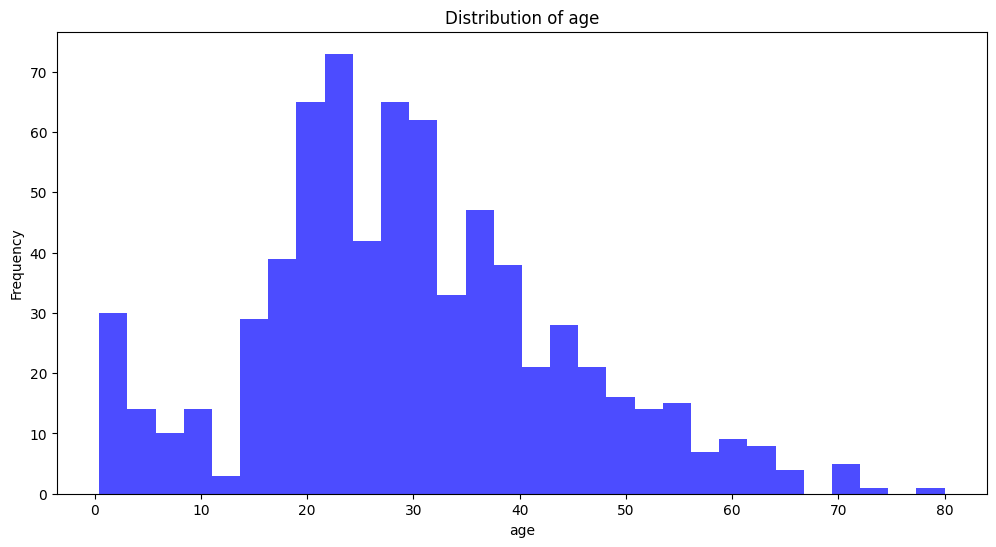

In [23]:
ops_df["plots"].iloc[3][0]